# Titanic Survivor Predictions using `RandomForestClassifier` model

## Import necessary libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load the cleaned and encoded data


In [8]:
# Load the cleaned and encoded data
titanic_data = pd.read_csv('../data/titanic_cleaned_encoded.csv')

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,...,TicketPrefix_SOTON/OQ,TicketPrefix_STON/O,TicketPrefix_STON/O2.,TicketPrefix_SW/PP,TicketPrefix_W./C.,TicketPrefix_W.E.P.,TicketPrefix_W/C,TicketPrefix_WE/P,AgeBin_Label,FareBin_Label
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,...,False,False,False,False,False,False,False,False,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,...,False,False,False,False,False,False,False,False,2,3
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,...,False,False,True,False,False,False,False,False,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,...,False,False,False,False,False,False,False,False,0,3
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,...,False,False,False,False,False,False,False,False,0,2


In [9]:
titanic_data.shape

(891, 64)

In [10]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Title_the Countess', 'TicketPrefix_A.5.',
       'TicketPrefix_A/4', 'TicketPrefix_A/4.', 'TicketPrefix_A/5',
       'TicketPrefix_A/5.', 'TicketPrefix_A/S', 'TicketPrefix_A4.',
       'TicketPrefix_C', 'TicketPrefix_C.A.', 'TicketPrefix_C.A./SOTON',
       'TicketPrefix_CA', 'TicketPrefix_CA.', 'TicketPrefix_F.C.',
       'TicketPrefix_F.C.C.', 'TicketPrefix_Fa', 'TicketPrefix_None',
       'TicketPrefix_P/PP', 'TicketPrefix_PC', 'TicketPrefix_PP',
       'TicketPrefix_S.C./A.4.', 'TicketPrefix_S.C./PARIS',
       'TicketPrefix_S.O./P.P.', 'TicketPrefix_S.O.C.', 'TicketPrefix_S.O.P.',
       'TicketPrefix_S.P.', 'TicketPrefix_S.W./PP', 'TicketPrefix_SC',
       'TicketPrefix_SC/AH', 'TicketPrefix_SC/PARIS', 'TicketPrefix_SC/Paris',
  

In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              891 non-null    int64  
 1   Survived                 891 non-null    int64  
 2   Pclass                   891 non-null    int64  
 3   Name                     891 non-null    object 
 4   Age                      891 non-null    float64
 5   SibSp                    891 non-null    int64  
 6   Parch                    891 non-null    int64  
 7   Ticket                   891 non-null    object 
 8   Fare                     891 non-null    float64
 9   FamilySize               891 non-null    int64  
 10  IsAlone                  891 non-null    int64  
 11  Sex_male                 891 non-null    bool   
 12  Embarked_Q               891 non-null    bool   
 13  Embarked_S               891 non-null    bool   
 14  Title_Miss               8

In [12]:
titanic_data.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Age                    0
                      ..
TicketPrefix_W.E.P.    0
TicketPrefix_W/C       0
TicketPrefix_WE/P      0
AgeBin_Label           0
FareBin_Label          0
Length: 64, dtype: int64

## Separate the features and targets

In [14]:
X = titanic_data.drop(columns=['Survived', 'Name', 'Ticket'], axis=1)
y = titanic_data['Survived']

## Splitting the data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(891, 61) (712, 61) (179, 61)


## Model training

In [19]:
# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

## Evaluaion

In [23]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8436


In [24]:
# Generate the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.81      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[91 14]
 [14 60]]


## Hyperparameter Tuning

In [53]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees
    'max_depth': [None, 10, 20, 30],            # Maximum depth of trees
    'min_samples_split': [2, 5, 10],            # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples at leaf node
    'max_features': ['sqrt', 'log2', None],     # Number of features to consider for the best split
    'bootstrap': [True, False]                  # Whether bootstrap samples are used when building trees
}

# Initialize the model
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [55]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [63]:
# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_rf_classifier.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Optimized Random Forest Accuracy: 0.8101
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[92 13]
 [21 53]]


## Feature Selection

In [68]:
# Get feature importance from the best model
feature_importances = grid_search.best_estimator_.feature_importances_

In [82]:
# Sort and plot feature importances
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)
print(features.head(30))

                    Feature  Importance
12                 Title_Mr    0.181358
8                  Sex_male    0.170019
5                      Fare    0.097907
1                    Pclass    0.074776
13                Title_Mrs    0.068370
2                       Age    0.067788
0               PassengerId    0.065359
11               Title_Miss    0.056339
6                FamilySize    0.043952
60            FareBin_Label    0.035316
3                     SibSp    0.027172
4                     Parch    0.018771
10               Embarked_S    0.015194
59             AgeBin_Label    0.013933
7                   IsAlone    0.009482
32        TicketPrefix_None    0.009098
14            Title_Officer    0.008552
52      TicketPrefix_STON/O    0.007274
9                Embarked_Q    0.007110
34          TicketPrefix_PC    0.006172
28         TicketPrefix_CA.    0.003032
25        TicketPrefix_C.A.    0.002392
21        TicketPrefix_A/5.    0.002047
27          TicketPrefix_CA    0.001810


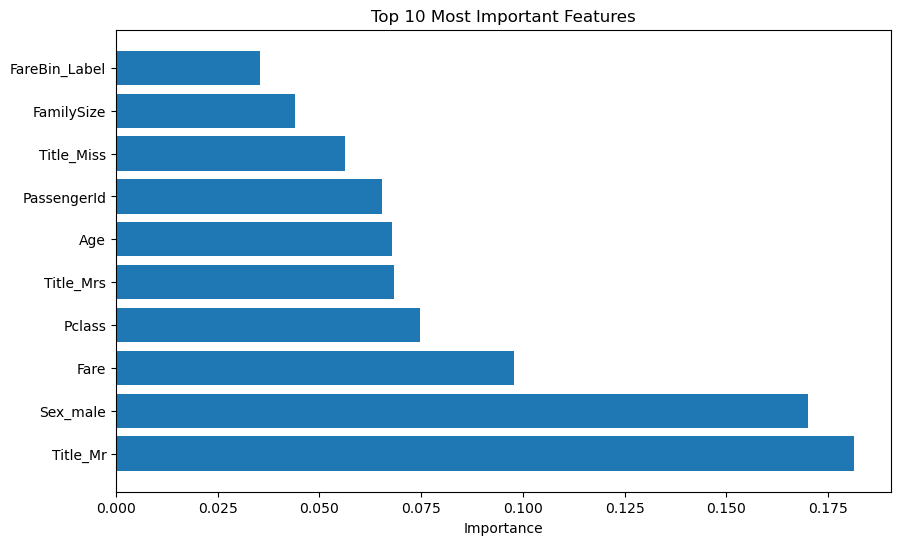

In [72]:
# Plot the most important features
plt.figure(figsize=(10, 6))
plt.barh(features['Feature'].head(10), features['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.show()